# IHA2 - Catching Pokemon

![](http://tibetanitech.com/wp-content/uploads/2016/09/Pokemon-GO.jpg)

In this home assignment, you'll apply roughly the same principles we used when doing logistic regression on the Iris dataset in Computer Lab 1, but on a new and very interesting dataset. We'll use the [Predict'em All dataset from Kaggle](https://www.kaggle.com/semioniy/predictemall) (download the dataset directly from Kaggle using this link). This dataset consists of roughly 293,000 [pokemon](http://www.pokemongo.com/) sightings (historical appearances of Pokemon in the Pokemon Go game), with geographical coordinates, time, weather, population density, distance to pokestops/gyms etc. as features. A comprehensive list of all the features is available at [the dataset's homepage](https://www.kaggle.com/semioniy/predictemall)

The context is simple: you are a Pokemon hunter, and there are only three Pokemon left for you to complete your collection. You'll do anything to capture them, including changing where you'll spend your next holidays! You know that some Pokemon only spawn in certain places of the world. Since you like machine learning so much, you figure it would be a great idea to train a classifier that, based on a location's latitude and longitude, can tell us which Pokemon is more likely to appear there.

The assignment is broken down into six steps.

1. Loading the data and extracting the desired subset of it
2. Visualization of the dataset
3. Preprocessing
4. Training
5. Evaluation
6. Exploration


Feel free to add cells wherever you see fit, and play around with this notebook as much as you want when developing the solutions. However, the solution you upload to Canvas must have the exact format shown here, with only the cells present here.

Don't restrict yourself only to what was taught so far. Some of the tasks might require you to search for new information. However, **be sure that you do the assignment using PyTorch** since we will be using it through the following assignments as well. [The python docs](https://docs.python.org/3/), [pytorch docs](https://pytorch.org/docs/stable/index.html), [stackoverflow](https://stackoverflow.com/), and Google are your friends!

**Hint:** Solving Computer Lab 1 (CL1) is a good way to get prepared for this assignment.

## 0. Imports

Import any necessary modules here.

In [7]:
# YOUR CODE HERE
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
import torch
from torch.utils.data import TensorDataset
from torch.utils.data import DataLoader
from torch import nn
import torch.nn.functional as F
import seaborn as sns
from torch import optim

## 1. Loading and extracting subset

The first step consists of filtering the dataset by the three pokemon you are interested at. 

Start by loading the `'300k.csv'` file using pandas. If you haven't downloaded it yet, use [this link](https://www.kaggle.com/semioniy/predictemall) to do so. 

In [8]:
# YOUR CODE HERE
Data = pd.read_csv("300k.csv") 

C:\Users\krthk\anaconda3\envs\dml\lib\site-packages\IPython\core\interactiveshell.py:3146: DtypeWarning: Columns (49) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


Create a new `DataFrame` with only the columns `latitude`, `longitude`, and `class`.

In [9]:
# YOUR CODE HERE
DataFrame = Data[["latitude" , "longitude" , "class"]]
print(DataFrame)

         latitude   longitude  class
0       20.525745  -97.460829     16
1       20.523695  -97.461167    133
2       38.903590  -77.199780     16
3       47.665903 -122.312561     13
4       47.666454 -122.311628    133
...           ...         ...    ...
296016  39.119052  -76.633194     19
296017  47.142237    7.244752     13
296018  42.258532  -87.881248     16
296019  26.230929  -98.194772     19
296020  50.144272   14.101178     96

[296021 rows x 3 columns]


Note that the `class` column specifies which pokemon it is. However, it only has the numerical id of the pokemon. For convenience, use the following dictionary to convert between ids and names.

In [10]:
name_dict={1: 'Bulbasaur', 2: 'Ivysaur', 3: 'Venusaur', 4: 'Charmander', 5: 'Charmeleon', 6: 'Charizard', 7: 'Squirtle', 8: 
          'Wartortle', 9: 'Blastoise', 10: 'Caterpie', 11: 'Metapod', 12: 'Butterfree', 13: 'Weedle', 14: 'Kakuna', 
          15: 'Beedrill', 16: 'Pidgey', 17: 'Pidgeotto', 18: 'Pidgeot', 19: 'Rattata', 20: 'Raticate', 21: 'Spearow',
          22: 'Fearow', 23: 'Ekans', 24: 'Arbok', 25: 'Pikachu', 26: 'Raichu', 27: 'Sandshrew', 28: 'Sandslash', 
          29: 'Nidoran F', 30: 'Nidorina', 31: 'Nidoqueen',32: 'Nidoran M', 33: 'Nidorino', 34: 'Nidoking', 35: 'Clefairy',
          36: 'Clefable', 37: 'Vulpix', 38: 'Ninetales', 39: 'Jigglypuff', 40: 'Wigglytuff', 41: 'Zubat', 42: 'Golbat', 
          43: 'Oddish', 44: 'Gloom', 45: 'Vileplume', 46: 'Paras', 47: 'Parasect', 48: 'Venonat', 49: 'Venomoth',
          50: 'Diglett', 51: 'Dugtrio', 52: 'Meowth', 53: 'Persian', 54: 'Psyduck',55: 'Golduck', 56: 'Mankey', 
          57: 'Primeape', 58: 'Growlithe', 59: 'Arcanine', 60: 'Poliwag', 61: 'Poliwhirl', 62: 'Poliwrath',
          63: 'Abra', 64: 'Kadabra', 65: 'Alakazam', 66: 'Machop', 67: 'Machoke', 68: 'Machamp', 69: 'Bellsprout', 
          70: 'Weepinbell', 71: 'Victreebel', 72: 'Tentacool', 73: 'Tentacruel', 74: 'Geodude', 75: 'Graveler',
          76: 'Golem', 77: 'Ponyta', 78: 'Rapidash', 79: 'Slowpoke', 80: 'Slowbro', 81: 'Magnemite', 82: 'Magneton',
          83: "Farfetch'd", 84: 'Doduo', 85: 'Dodrio', 86: 'Seel', 87: 'Dewgong', 88: 'Grimer', 89: 'Muk', 
          90: 'Shellder', 91: 'Cloyster', 92: 'Gastly', 93: 'Haunter', 94: 'Gengar', 95: 'Onix', 96: 'Drowzee',
          97: 'Hypno', 98: 'Krabby', 99: 'Kingler', 100: 'Voltorb', 101: 'Electrode', 102: 'Exeggcute', 103: 'Exeggutor', 
          104: 'Cubone', 105: 'Marowak', 106: 'Hitmonlee', 107: 'Hitmonchan', 108: 'Lickitung', 109: 'Koffing',
          110: 'Weezing', 111: 'Rhyhorn', 112: 'Rhydon', 113: 'Chansey', 114: 'Tangela', 115: 'Kangaskhan', 116: 'Horsea', 
          117: 'Seadra', 118: 'Goldeen', 119: 'Seaking', 120: 'Staryu', 121: 'Starmie', 122: 'Mr. Mime', 123: 'Scyther', 
          124: 'Jynx', 125: 'Electabuzz', 126: 'Magmar', 127: 'Pinsir', 128: 'Tauros', 129: 'Magikarp', 130: 'Gyarados', 
          131: 'Lapras', 132: 'Ditto', 133: 'Eevee', 134: 'Vaporeon', 135: 'Jolteon', 136: 'Flareon', 137: 'Porygon', 
          138: 'Omanyte', 139: 'Omastar', 140: 'Kabuto', 141: 'Kabutops', 142: 'Aerodactyl', 143: 'Snorlax', 144: 'Articuno',
          145: 'Zapdos', 146: 'Moltres', 147: 'Dratini', 148: 'Dragonair', 149: 'Dragonite', 150: 'Mewtwo', 'Bulbasaur': 1, 'Ivysaur': 2, 'Venusaur': 3, 'Charmander': 4, 'Charmeleon': 5, 'Charizard': 6, 'Squirtle': 7, 'Wartortle': 8, 'Blastoise': 9, 'Caterpie': 10, 'Metapod': 11, 'Butterfree': 12, 'Weedle': 13, 'Kakuna': 14, 'Beedrill': 15, 'Pidgey': 16, 'Pidgeotto': 17, 'Pidgeot': 18, 'Rattata': 19, 'Raticate': 20, 'Spearow': 21, 'Fearow': 22, 'Ekans': 23, 'Arbok': 24, 'Pikachu': 25, 'Raichu': 26, 'Sandshrew': 27, 'Sandslash': 28, 'Nidoran F': 29, 'Nidorina': 30, 'Nidoqueen': 31, 'Nidoran M': 32, 'Nidorino': 33, 'Nidoking': 34, 'Clefairy': 35, 'Clefable': 36, 'Vulpix': 37, 'Ninetales': 38, 'Jigglypuff': 39, 'Wigglytuff': 40, 'Zubat': 41, 'Golbat': 42, 'Oddish': 43, 'Gloom': 44, 'Vileplume': 45, 'Paras': 46, 'Parasect': 47, 'Venonat': 48, 'Venomoth': 49, 'Diglett': 50, 'Dugtrio': 51, 'Meowth': 52, 'Persian': 53, 'Psyduck': 54, 'Golduck': 55, 'Mankey': 56, 'Primeape': 57, 'Growlithe': 58, 'Arcanine': 59, 'Poliwag': 60, 'Poliwhirl': 61, 'Poliwrath': 62, 'Abra': 63, 'Kadabra': 64, 'Alakazam': 65, 'Machop': 66, 'Machoke': 67, 'Machamp': 68, 'Bellsprout': 69, 'Weepinbell': 70, 'Victreebel': 71, 'Tentacool': 72, 'Tentacruel': 73, 'Geodude': 74, 'Graveler': 75, 'Golem': 76, 'Ponyta': 77, 'Rapidash': 78, 'Slowpoke': 79, 'Slowbro': 80, 'Magnemite': 81, 'Magneton': 82, 'Farfetch\'d': 83, 'Doduo': 84, 'Dodrio': 85, 'Seel': 86, 'Dewgong': 87, 'Grimer': 88, 'Muk': 89, 'Shellder': 90, 'Cloyster': 91, 'Gastly': 92, 'Haunter': 93, 'Gengar': 94, 'Onix': 95, 'Drowzee': 96, 'Hypno': 97, 'Krabby': 98, 'Kingler': 99, 'Voltorb': 100, 'Electrode': 101, 'Exeggcute': 102, 'Exeggutor': 103, 'Cubone': 104, 'Marowak': 105, 'Hitmonlee': 106, 'Hitmonchan': 107, 'Lickitung': 108, 'Koffing': 109, 'Weezing': 110, 'Rhyhorn': 111, 'Rhydon': 112, 'Chansey': 113, 'Tangela': 114, 'Kangaskhan': 115, 'Horsea': 116, 'Seadra': 117, 'Goldeen': 118, 'Seaking': 119, 'Staryu': 120, 'Starmie': 121, 'Mr. Mime': 122, 'Scyther': 123, 'Jynx': 124, 'Electabuzz': 125, 'Magmar': 126, 'Pinsir': 127, 'Tauros': 128, 'Magikarp': 129, 'Gyarados': 130, 'Lapras': 131, 'Ditto': 132, 'Eevee': 133, 'Vaporeon': 134, 'Jolteon': 135, 'Flareon': 136, 'Porygon': 137, 'Omanyte': 138, 'Omastar': 139, 'Kabuto': 140, 'Kabutops': 141, 'Aerodactyl': 142, 'Snorlax': 143, 'Articuno': 144, 'Zapdos': 145, 'Moltres': 146, 'Dratini': 147, 'Dragonair': 148, 'Dragonite': 149, 'Mewtwo': 150}

In [11]:
# example usage (you can index either by name or id)
print(name_dict['Gengar'])
print(name_dict[94])

94
Gengar


We are only interested in three specific pokemon: Diglett, Seel, and Tauros.

<table style="width:100%">
  <tr>
    <th> <center>Diglett</center> </th>
    <th> <center>Seel</center> </th> 
    <th> <center>Tauros</center> </th>
  </tr>
  <tr>
    <td><img src=https://assets.pokemon.com/assets/cms2/img/pokedex/full/050_f2.png alt=Digglet></td>
    <td><img src=https://pokemon.gamepedia.com/media/pokemon.gamepedia.com/thumb/f/f1/Seel.png/200px-Seel.png?version=2c32fbe0af2d0da707e5dbcb40472fbf></td>
    <td><img src=https://vignette2.wikia.nocookie.net/pokemon/images/0/01/128Tauros_AG_anime.png/revision/latest?cb=20140924030616></td>
  </tr>
</table>



Filter the dataset to contain only these pokemon.

In [12]:
# YOUR CODE HERE
ids = [name_dict['Diglett'], name_dict['Seel'], name_dict['Tauros']]
dataSetFilt = DataFrame.loc[DataFrame["class"].isin(ids)] 
print(dataSetFilt)

         latitude   longitude  class
90      49.146199 -122.638105     50
137     44.476769  -73.212749    128
225     39.767486  -86.161068    128
550     49.999197    9.066973     86
629     25.724382 -100.379311     50
...           ...         ...    ...
294822  34.190725 -118.490821    128
294909  34.189895 -118.490000     86
295194  53.555035   -0.087039     86
295436  34.186898 -118.488905     86
295529  39.748243  -84.086557    128

[2083 rows x 3 columns]


## 2. Visualization of the dataset

The second step consists of visualizing the dataset. This will help you understand the distribution of the features and get an idea of how hard the task will be.

Plot a histogram of the number of occurrences of each class.

Text(0, 0.5, '# Occurences')

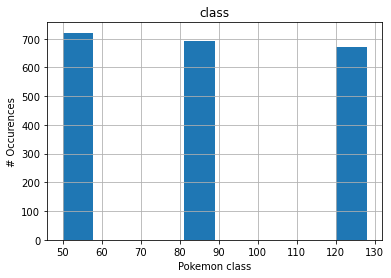

In [13]:
# YOUR CODE HERE
dataSetFilt.hist(column="class")
plt.xlabel("Pokemon class")
plt.ylabel("# Occurences")

Is the dataset balanced?

**Your answer:** 
     The dataset is almost balanced, since the number of occurrences of each class varies by very small factor.

Plot a scatter plot where the first dimension is latitude, the second is longitude, and each point is a Pokemon. Further, the color of each point should represent which Pokemon it is. Lastly, the marker at each point should be an `'x'`. Make sure to label each axis.

Hints:

- The `scatter` method from `matplotlib` accepts an argument called `c`.
- The `scatter` method also accepts an argument called `marker`.

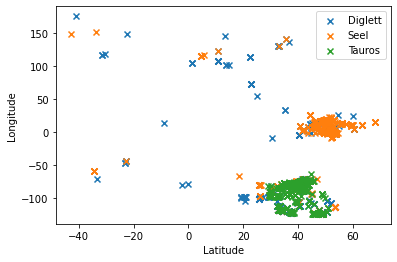

In [14]:
# YOUR CODE HERE
for i in ids:
    filt_temp = dataSetFilt['class'] == i
    plt.scatter(dataSetFilt['latitude'][filt_temp], dataSetFilt['longitude'][filt_temp] , marker='x')
plt.legend(["Diglett","Seel","Tauros"])
plt.xlabel("Latitude")
plt.ylabel("Longitude")
plt.show()

Is there any other visualization you think would be useful? If so, insert it here.

**Your answer:** Scatter plot is better for latitude and longitude data.

How hard do you think the problem is? Which classes can/cannot be easily separated?


**Your answer:**
    The problem is pretty hard to solve, since the Diglett is spread across the region(cannot be easily separated) while Tauros is more concentrated as one blob. The Seel is also concentrated as two blobs and thus also difficult to separate.

Which accuracy do you expect to achieve?

**Your answer:**
    Accuracy expected is around 55 to 65 %

## 3. Preprocessing

The third step consists of processing the data before training, such as dividing the dataset into training, validation, and test sets. Some tranformations can also be applied to the dataset in order to improve the performance of the network. 

Start by creating the input and output vectors.

In [15]:
# YOUR CODE HERE
X = dataSetFilt[["latitude" , "longitude"]].to_numpy()

def encode_species(val):
    if val == 50:
        return 0
    if val == 86:
        return 1
    if val == 128:
        return 2
    else:
        raise ValueError('Species \'{}\' is not recognized.'.format(species))
        
temp = map(encode_species, dataSetFilt['class'].values)
Y = np.array(list(temp))
print(Y[0:10])

[0 2 2 1 0 2 0 0 1 0]


Separate your data into training (55%), validation (25%) and test sets (20%). If you wish to apply any transformation to the dataset, do it here as well. 

In [16]:
# YOUR CODE HERE
x_trainval, x_test, y_trainval, y_test = train_test_split(X, Y, test_size=0.2, random_state=10)
x_train, x_val, y_train, y_val = train_test_split(x_trainval, y_trainval, test_size=0.3125, random_state=10)

## 4. Training

The fourth step is where you will choose the architecture of your network (number of hidden layers, activation functions, etc.), and train it. 

Start by choosing an architecture for your network.

In [17]:
# YOUR CODE HERE

# A `numpy array` can easily be made into a `torch.Tensor´
torch_x = torch.tensor(x_train, dtype=torch.float32)
torch_y = torch.tensor(y_train, dtype=torch.int64)

train_dataset = TensorDataset(torch_x, torch_y)
train_dataloader = DataLoader(train_dataset,batch_size = len(X))

weights = torch.randn(2, 3)
weights.requires_grad_()
bias = torch.zeros(3, requires_grad=True)

torch_x_val = torch.tensor(x_val, dtype = torch.float32)
torch_y_val = torch.tensor(y_val, dtype = torch.int64)

val_dataset = TensorDataset(torch_x_val, torch_y_val)
val_dataloader = DataLoader(val_dataset, batch_size = len(X))

class ClassifierNetwork(nn.Module):
    def __init__(self):
        super().__init__()
        self.layer_1 = nn.Linear(2, 7)
        self.layer_2 = nn.Linear(7, 5)
        self.layer_3 = nn.Linear(5, 4)
        self.layer_out = nn.Linear(4, 3)
        
    def forward(self, x):
        x = F.relu(self.layer_1(x))
        x = F.relu(self.layer_2(x))
        x = F.relu(self.layer_3(x))
        x = self.layer_out(x)
        return x

model = ClassifierNetwork()
loss_fn = nn.CrossEntropyLoss()

Train the network.

In [18]:
optimizer = optim.Adam(model.parameters(), lr=0.001)

def evaluate_model(val_dataloader, model, loss_fn):
    losses = []
    n_correct = 0
    with torch.no_grad():
        for b_x, b_y in val_dataloader:
            pred = model(b_x)
            loss = loss_fn(pred, b_y)
            losses.append(loss.item())
            
            hard_preds = pred.argmax(dim=1)
            n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()
        val_accuracy = n_correct/len(val_dataset)
        val_avg_loss = sum(losses)/len(losses)    
    
    return val_accuracy, val_avg_loss

for epoch in range(100):
    losses = []
    n_correct = 0
    for b_x, b_y in train_dataloader:
        
        # Compute predictions and losses
        pred = model(b_x)
        loss = loss_fn(pred, b_y)
        losses.append(loss.item())
        
        # Count number of correct predictions
        hard_preds = pred.argmax(dim=1)
        n_correct += torch.sum(pred.argmax(dim=1) == b_y).item()

        # Backpropagate
        loss.backward()
        optimizer.step()
        optimizer.zero_grad()    
        
    # Compute accuracy and loss in the entire training set
    train_accuracy = n_correct/len(train_dataset)
    train_avg_loss = sum(losses)/len(losses)    
        
    # Compute accuracy and loss in the entire validation set
    val_accuracy, val_avg_loss = evaluate_model(val_dataloader, model, loss_fn)
        
    # Display metrics
    display_str = 'Epoch {} '
    display_str += '\tLoss: {:.3f} '
    display_str += '\tLoss (val): {:.3f}'
    display_str += '\tAccuracy: {:.2f} '
    display_str += '\tAccuracy (val): {:.2f}'
    print(display_str.format(epoch, train_avg_loss, val_avg_loss, train_accuracy, val_accuracy))

Epoch 0 	Loss: 2.231 	Loss (val): 1.897	Accuracy: 0.31 	Accuracy (val): 0.32
Epoch 1 	Loss: 2.080 	Loss (val): 1.777	Accuracy: 0.31 	Accuracy (val): 0.32
Epoch 2 	Loss: 1.935 	Loss (val): 1.665	Accuracy: 0.31 	Accuracy (val): 0.32
Epoch 3 	Loss: 1.799 	Loss (val): 1.561	Accuracy: 0.31 	Accuracy (val): 0.32
Epoch 4 	Loss: 1.673 	Loss (val): 1.470	Accuracy: 0.31 	Accuracy (val): 0.32
Epoch 5 	Loss: 1.562 	Loss (val): 1.389	Accuracy: 0.31 	Accuracy (val): 0.32
Epoch 6 	Loss: 1.460 	Loss (val): 1.318	Accuracy: 0.31 	Accuracy (val): 0.32
Epoch 7 	Loss: 1.371 	Loss (val): 1.262	Accuracy: 0.31 	Accuracy (val): 0.32
Epoch 8 	Loss: 1.296 	Loss (val): 1.222	Accuracy: 0.31 	Accuracy (val): 0.32
Epoch 9 	Loss: 1.240 	Loss (val): 1.200	Accuracy: 0.31 	Accuracy (val): 0.32
Epoch 10 	Loss: 1.203 	Loss (val): 1.195	Accuracy: 0.31 	Accuracy (val): 0.36
Epoch 11 	Loss: 1.186 	Loss (val): 1.205	Accuracy: 0.38 	Accuracy (val): 0.23
Epoch 12 	Loss: 1.186 	Loss (val): 1.224	Accuracy: 0.28 	Accuracy (val): 0

## 5. Evaluation

Once you achieved at least 50% accuracy in the validation set, we are done with training. Now we'll evaluate the performance of your classifier on the test set.

Compute the accuracy on the test set.

In [19]:
# YOUR CODE HERE
test_samples = torch.tensor(x_test, dtype=torch.float32)
test_labels = torch.tensor(y_test, dtype=torch.int64)

prediction = model(test_samples).argmax(dim=1)
accuracy = (prediction == test_labels).sum().item()/len(prediction)
print("Accuracy: %.2f" %accuracy)

Accuracy: 0.59


Compute the confusion matrix of your predictions on the test set.

In [20]:
# YOUR CODE HERE
from sklearn.metrics import confusion_matrix
preds = model(test_samples).argmax(dim=1)
confusion_matrix(test_labels, preds)

array([[121,   9,  13],
       [ 57,  39,  34],
       [ 60,   0,  84]], dtype=int64)

Visualize the decision regions of the network. Overlap it with the points corresponding to the training data, such as in Section 2, by using the scatter plot function.

Hint: A simple way to do it is to generate a lot of points within a predefined range of longitude and latitude and apply your network to it. However, feel free to explore other ways.

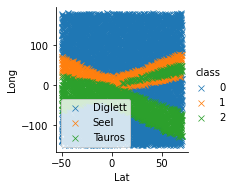

In [21]:
lat = np.random.uniform(-50, 70, size=(8000,1))
long = np.random.uniform(-150, 180, size=(8000,1))
rcoord = np.concatenate((lat,long),axis=1)
xnew = np.concatenate((x_train,rcoord))
test = torch.tensor(xnew, dtype=torch.float32)
vis = pd.DataFrame(data=xnew, columns=["latitude", "longitude"])
vis['class'] = model(test).argmax(dim=1).numpy().tolist()
final = sns.pairplot(x_vars=['latitude'], y_vars=['longitude'], data=vis, hue="class",markers='x')
plt.xlabel('Lat')
plt.ylabel('Long')
plt.legend(['Diglett', 'Seel','Tauros'])

Do the learned decision regions look like you would expect? Please comment on your results. 

**Your answer:**
    From the learned decision regions it can be seen that Digilette is spread across the region, but the other two classes doesn't fit correctly and hence doesn't look as expected.

## 6. Exploration

To investigate your hypothesis, plot a histogram of the selected feature(s) for each one of the pokemons we're interested in. For example, if you think pressure and population density are valuable for prediction, plot 6 histograms. 3 of them will be the pressure histograms for each class ('Diglett', 'Seel' and 'Tauros'), and the other 3 will be the population density for each class.

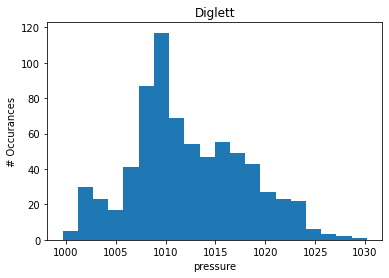

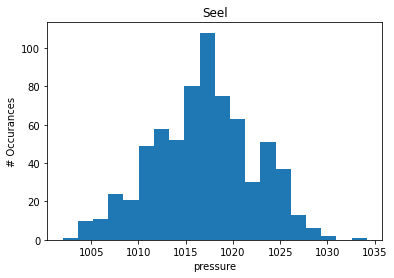

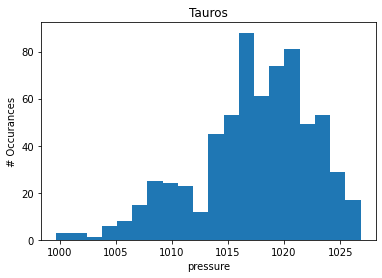

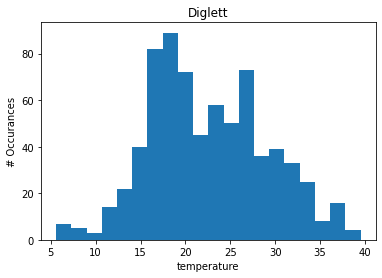

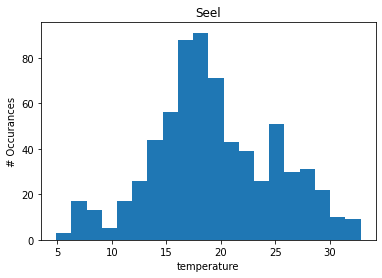

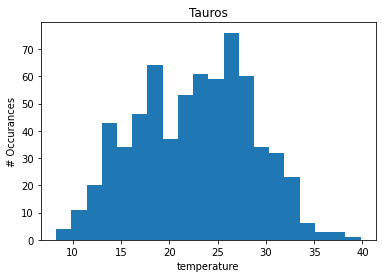

In [22]:
for feat in ['pressure','temperature']:
    for i in ids:
        tempData = Data.loc[Data['class']==i]
        histo = tempData[feat].tolist()
        plt.hist(histo, bins= 20)
        plt.xlabel(feat)
        plt.ylabel('# Occurances')
        plt.title(name_dict[i])
        plt.show()